The data I have is a bunch of images of a 10x10cm square taken at distances of 30cm to 300cm with 10cm gaps
the size of the object in the image is in `pixels` and the distance to the object is in `cm`.

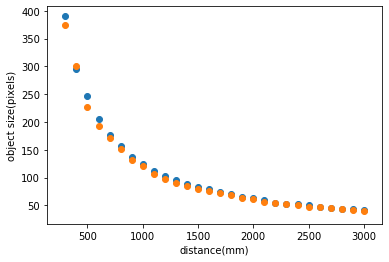

In [107]:
# get the data
%matplotlib inline
from pylab import *
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('scaling2.csv', delimiter = ',')

plt.xlabel("distance(mm)")
plt.ylabel("object size(pixels)")

data = np.delete(data, (0), axis = 0) # remove the header
# separate the columns
distances = data[:, 0]
pixelLengthX = data[:, 1]
pixelLengthY = data[:, 2]
# plot it
scatter(distances, pixelLengthX)
scatter(distances, pixelLengthY)

## Le formula
The relation between distance to an object and its size in an image is:
```
(distance to object / focal length) = (objects size / size of objects image)
```
So then:
```
size of objects image = objects size * focal length / distance to object
```

**Use ONE UNIT for all this stuff, I used millimeteres.**


### That gives us the image size in mm but I want it in pixels

**To convert mm to pixels:**
* find your cameras sensor size, in mm
* find your cameras resolution

Then calculate `pixels/mm`, and multiply `image size` with your `pixels/mm` value.


Thing is I could'nt find the size of my cameras sensor, sooooooooooo I just multpilied the `image size` values with random numbers for my `pixels/mm` value till I got results that matched the actual data.

In [108]:
# generates predicted image size data so we can graph it along with the collected data

def calculateImageSize(size, f, distanceArr):
    # using a while loop as a for loop coz this is the easier way to to this
    imageSize = []
    i = 0
    while i < len(distanceArr):
        imageSize.append(size * f / distanceArr[i])
        i += 1
    return imageSize

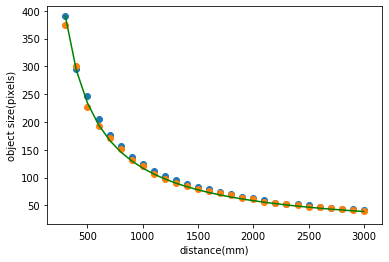

In [111]:
# calculate and graph the data alongside calculated values

objectSizeX = 100
objectSizeY = 100
focalLength = 6
pixelsPerMM = 195

xp = np.linspace(300, 3000, 28) # starting point, ending point, level of detail

# get the image sizes
calculatedImageSize = calculateImageSize(objectSizeX, focalLength, distances)
# and we want it to be in pixels
for i in calculatedImageSize:
    calculatedImageSize[calculatedImageSize.index(i)] *= pixelsPerMM

# show the data
scatter(distances, xLengthP)
scatter(distances, yLengthP)

# draw the calculated data
plt.plot(xp, imageSizeX, c='g')

plt.xlabel("distance(mm)")
plt.ylabel("object size(pixels)")
plt.show()